<a href="https://colab.research.google.com/github/AiconKeliste/CPE031-Visualization-and-Data-Analysis/blob/main/Keliste_Hands_On_Activity_9___Exploring_Data_Visually_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Hands-On Activity 9 | Exploring Data Visually**





---



Name : Aicon H. Keliste <br>
Course Code and Title : CPE 031 Visualization and Data Analysis<br>
Date Submitted : 10/16/25 <br>
Instructor : Maam Sayo


---



**1. Objectives:**

This activity aims to demonstrate students’ ability to visually explore and analyze data using Python. Students will learn how to summarize and visualize categorical, quantitative, time-series, and geospatial data for exploratory data analysis (EDA).

**2. Intended Learning Outcomes (ILOs):**

By the end of this module the students should be able to demonstrate:
1. Analyze various visualization techniques to determine how data representation methods influence understanding, perception, and decision-making.

2. Evaluate existing visualizations in terms of accuracy, clarity, aesthetics, and accessibility, providing justified recommendations for improvement.

3. Create effective, insightful, and user-centered visualizations by integrating appropriate design principles, data encoding techniques, and visualization tools.

**3. Discussions:**

Exploratory Data Analysis (EDA) is the process of analyzing datasets to summarize their main characteristics and gain insights before formal modeling. Visual exploration helps identify trends, relationships, and data quality issues.

Key Components:

Univariate Analysis:
Analyzing one variable at a time (e.g., histograms, bar charts).

Bivariate Analysis:
Exploring relationships between two variables (e.g., scatterplots, crosstabs).

Missing Data Analysis:
Identifying and handling missing or null values.

Time-Series Visualization:
Displaying data across time to reveal trends or seasonality.

Geospatial Visualization:
Mapping data to geographical regions to identify spatial patterns.

EDA is both an art and science combining statistical summaries with visual intuition.

**4. Procedures:**

**Color and Perception**

Section 1: Organizing and Exploring Data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sample dataset
data = {
    "Product": ["Juice", "Smoothie", "Juice", "Smoothie", "Juice", "Smoothie"],
    "Region": ["North", "South", "East", "West", "North", "East"],
    "Sales": [120, 150, 90, 110, 130, 170],
    "Profit": [30, 45, 20, 25, 35, 50]
}
df = pd.DataFrame(data)

# Display the dataset
df

,Product,Region,Sales,Profit
0,Juice,North,120,30
1,Smoothie,South,150,45
2,Juice,East,90,20
3,Smoothie,West,110,25
4,Juice,North,130,35
5,Smoothie,East,170,50


Task 1: Analyzing Variables One at a Time

/tmp/ipython-input-2975764973.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Region", data=df, palette="Set2")


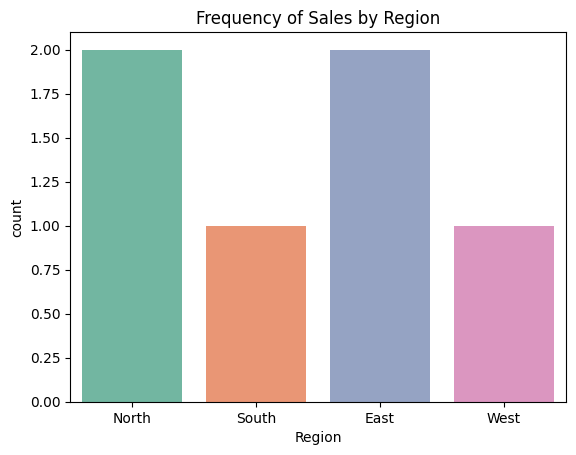

In [ ]:
#Categorical Variable
# Countplot for categorical variable
sns.countplot(x="Region", data=df, palette="Set2")
plt.title("Frequency of Sales by Region")
plt.show()


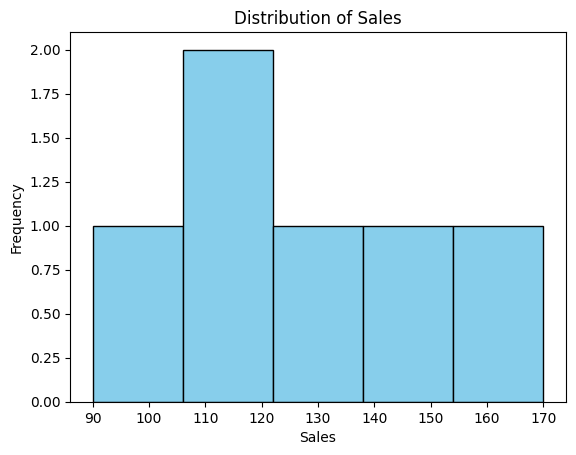

In [ ]:
#Quantitative Variable
# Histogram for quantitative variable
plt.hist(df["Sales"], bins=5, color="skyblue", edgecolor="black")
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

Task: <br>
Create one countplot for Product and one histogram for Profit. <br>
Compare their patterns and interpret what they mean.

In [ ]:
#Code here
sns.countplot(x="Product", data=df, hue="Product", palette="viridis", legend=False)
plt.title("Countplot for Product")
plt.show()

In [ ]:
# Histogram for Profit
plt.hist(df["Profit"], bins=5, color="lime", edgecolor="black")
plt.title("Histogram of Profit")
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.show()

Section 2: Relationships Between Variables

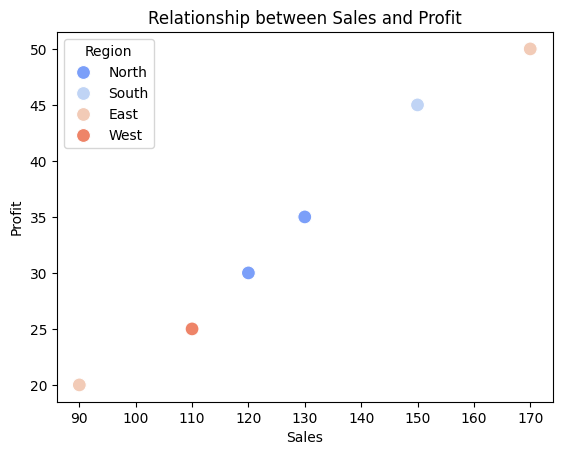

In [ ]:
# Scatterplot: Sales vs Profit
sns.scatterplot(x="Sales", y="Profit", hue="Region", data=df, palette="coolwarm", s=100)
plt.title("Relationship between Sales and Profit")
plt.show()

In [ ]:
# Crosstabulation example
pd.crosstab(df["Region"], df["Product"], values=df["Sales"], aggfunc="mean").fillna(0)


Product,Juice,Smoothie
Region,,
East,90.0,170.0
North,125.0,0.0
South,0.0,150.0
West,0.0,110.0


Task: <br>
Interpret whether higher sales also mean higher profit. <br>
Which region seems to perform best?

*Answer here <br>
First is the bar chart that interprets the countplot for products such as juice and smoothie, while the second one is for the histogram of the profit.

Section 3: Analysis of Missing Data

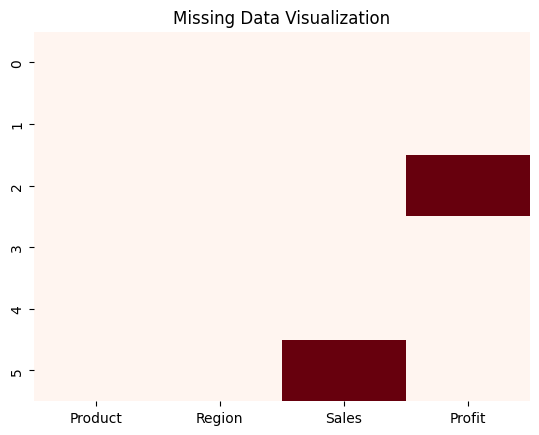

,0
Product,0
Region,0
Sales,1
Profit,1


In [ ]:
# Introduce missing data
df_missing = df.copy()
df_missing.loc[2, "Profit"] = np.nan
df_missing.loc[5, "Sales"] = np.nan

# Visualize missing data
sns.heatmap(df_missing.isnull(), cbar=False, cmap="Reds")
plt.title("Missing Data Visualization")
plt.show()

# Display missing summary
df_missing.isnull().sum()


Task: <br>
Describe what you observe in the missing data visualization. <br>
Which variables need attention before analysis?

*Answer here <br>
Based on the scatter plot and the table above you can see which regions generate the most Sales and how those Sales relate to Profit

Section 4: Visualizing Time-Series Data

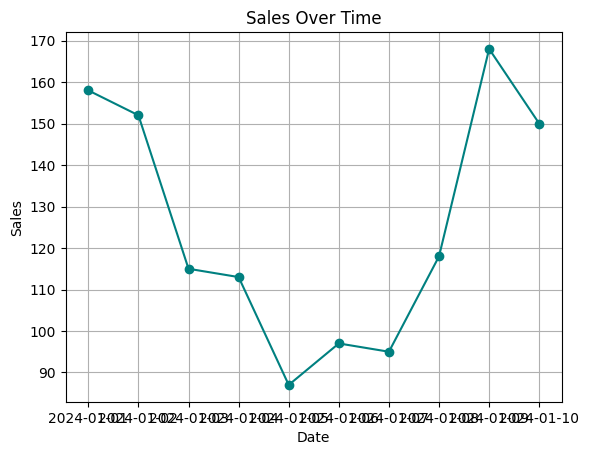

In [ ]:
# Generate time-series example
dates = pd.date_range(start="2024-01-01", periods=10)
sales = np.random.randint(80, 200, 10)
ts_df = pd.DataFrame({"Date": dates, "Sales": sales})

# Line chart for time-series
plt.plot(ts_df["Date"], ts_df["Sales"], marker="o", color="teal")
plt.title("Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

Task: <br>
Add a moving average line (rolling mean) to smooth fluctuations. <br>
Hint: Use ts_df["Sales"].rolling(window=3).mean().

In [ ]:
#Code here
# Add a moving average line
ts_df["Sales_RollingMean"] = ts_df["Sales"].rolling(window=3).mean()

# Plot time-series with moving average
plt.plot(ts_df["Date"], ts_df["Sales"], marker="o", color="teal", label="Sales")
plt.plot(ts_df["Date"], ts_df["Sales_RollingMean"], color="red", linestyle="--", label="3-Period Rolling Mean")
plt.title("Sales Over Time with Moving Average")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.legend()
plt.show()

Section 5: Visualizing Geospatial Data

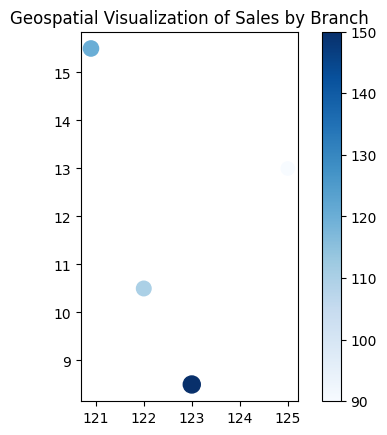

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

# Sample coordinates (latitude, longitude)
coords = {
    "Branch": ["North", "South", "East", "West"],
    "Latitude": [15.5, 8.5, 13.0, 10.5],
    "Longitude": [120.9, 123.0, 125.0, 122.0],
    "Sales": [120, 150, 90, 110]
}

geo_df = pd.DataFrame(coords)
geo_df["geometry"] = [Point(xy) for xy in zip(geo_df.Longitude, geo_df.Latitude)]
gdf = gpd.GeoDataFrame(geo_df, geometry="geometry")

# Plot simple map (Philippines outline optional if available)
gdf.plot(column="Sales", cmap="Blues", legend=True, markersize=geo_df["Sales"])
plt.title("Geospatial Visualization of Sales by Branch")
plt.show()

Task: <br>
Interpret which branch has the highest sales geographically. <br>
How can such visualization help in business decision-making?

*Answer here <br>
Based on the geospatial visualization I can identify which branch has the highest sales by looking at the size and color of the marker. Mapping sales by branch reveals spatial patterns of demand that support targeted actions.

**5. Supplementary Activity**

Create your own mini exploratory analysis:

1. Choose a dataset (e.g., from Kaggle, or a CSV file you have).

2. Perform:

*   Univariate analysis (1 categorical + 1 quantitative)
*   Bivariate analysis (scatterplot or crosstab)
*   Missing data visualization
*   Time-series or geospatial visualization (choose one)
3. Summarize your key insights using visual interpretation.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df  = pd.read_csv("/content/drive/MyDrive/VDA/GroceryStoreDataSet.csv")
df

,"MILK,BREAD,BISCUIT"
0,"BREAD,MILK,BISCUIT,CORNFLAKES"
1,"BREAD,TEA,BOURNVITA"
2,"JAM,MAGGI,BREAD,MILK"
3,"MAGGI,TEA,BISCUIT"
4,"BREAD,TEA,BOURNVITA"
5,"MAGGI,TEA,CORNFLAKES"
6,"MAGGI,BREAD,TEA,BISCUIT"
7,"JAM,MAGGI,BREAD,TEA"
8,"BREAD,MILK"
9,"COFFEE,COCK,BISCUIT,CORNFLAKES"


In [12]:
# Prepare data
df_split = df['MILK,BREAD,BISCUIT'].str.split(',', expand=True)

all_items = df_split.stack()
all_items = all_items.reset_index(drop=True)

df_transformed = pd.get_dummies(df_split.stack()).groupby(level=0).sum()
df_transformed = df_transformed.astype(bool)

df['Number_of_Items'] = df_split.count(axis=1)

display(df_transformed.head())
display(df.head())

,BISCUIT,BOURNVITA,BREAD,COCK,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
0,True,False,True,False,False,True,False,False,True,False,False
1,False,True,True,False,False,False,False,False,False,False,True
2,False,False,True,False,False,False,True,True,True,False,False
3,True,False,False,False,False,False,False,True,False,False,True
4,False,True,True,False,False,False,False,False,False,False,True


,"MILK,BREAD,BISCUIT",Number_of_Items
0,"BREAD,MILK,BISCUIT,CORNFLAKES",4
1,"BREAD,TEA,BOURNVITA",3
2,"JAM,MAGGI,BREAD,MILK",4
3,"MAGGI,TEA,BISCUIT",3
4,"BREAD,TEA,BOURNVITA",3


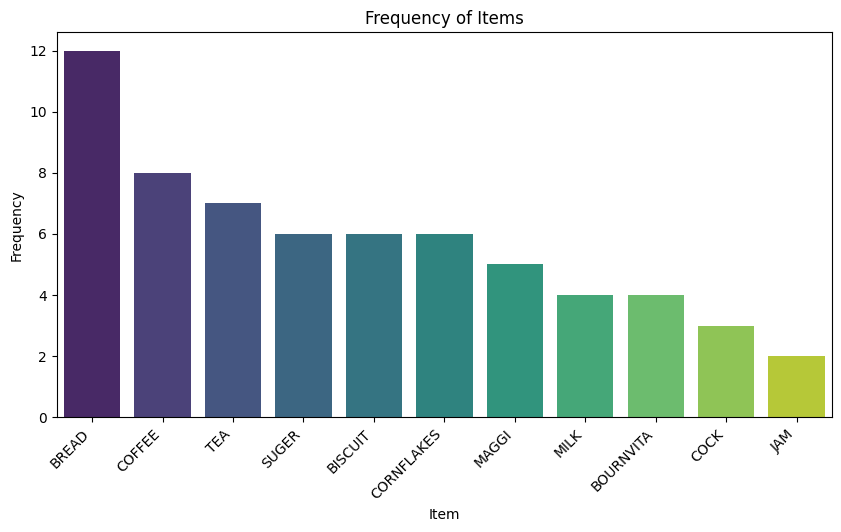

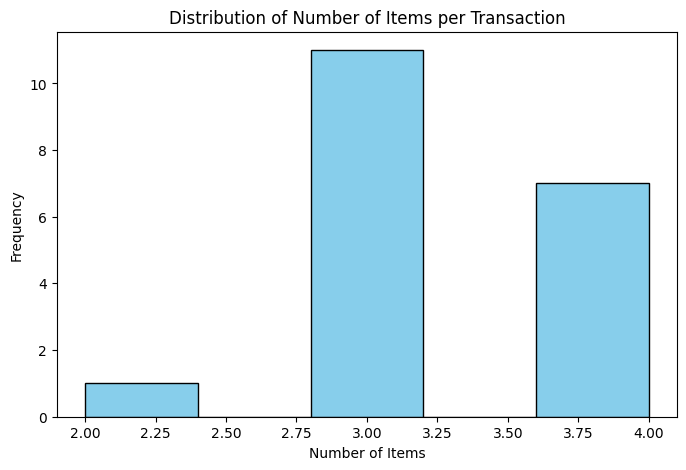

In [16]:
# Univariate analysis

# Categorical variable: Countplot of all items
item_counts = all_items.value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=item_counts.index, y=item_counts.values, hue=item_counts.index, palette="viridis", legend=False)
plt.title("Frequency of Items")
plt.xlabel("Item")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")
plt.show()

# Quantitative variable: Histogram of number of items per transaction
plt.figure(figsize=(8, 5))
plt.hist(df["Number_of_Items"], bins=5, color="skyblue", edgecolor="black")
plt.title("Distribution of Number of Items per Transaction")
plt.xlabel("Number of Items")
plt.ylabel("Frequency")
plt.show()

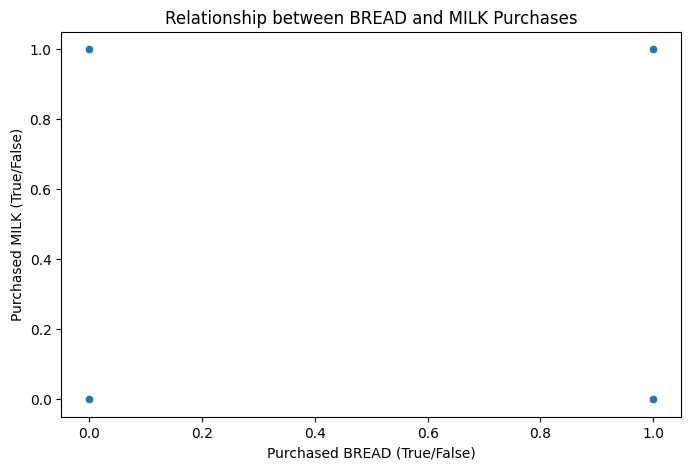


Crosstabulation of BREAD and MILK Purchases:
MILK   False  True 
BREAD              
False      6      1
True       9      3


In [24]:
# Bivariate analysis (scatterplot or crosstab)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_transformed['BREAD'], y=df_transformed['MILK'])
plt.title("Relationship between BREAD and MILK Purchases")
plt.xlabel("Purchased BREAD (True/False)")
plt.ylabel("Purchased MILK (True/False)")
plt.show()


# Crosstabulation: Relationship between two categorical variables (e.g., BREAD and MILK purchase)
crosstab_result = pd.crosstab(df_transformed['BREAD'], df_transformed['MILK'])
print("\nCrosstabulation of BREAD and MILK Purchases:")
print(crosstab_result)

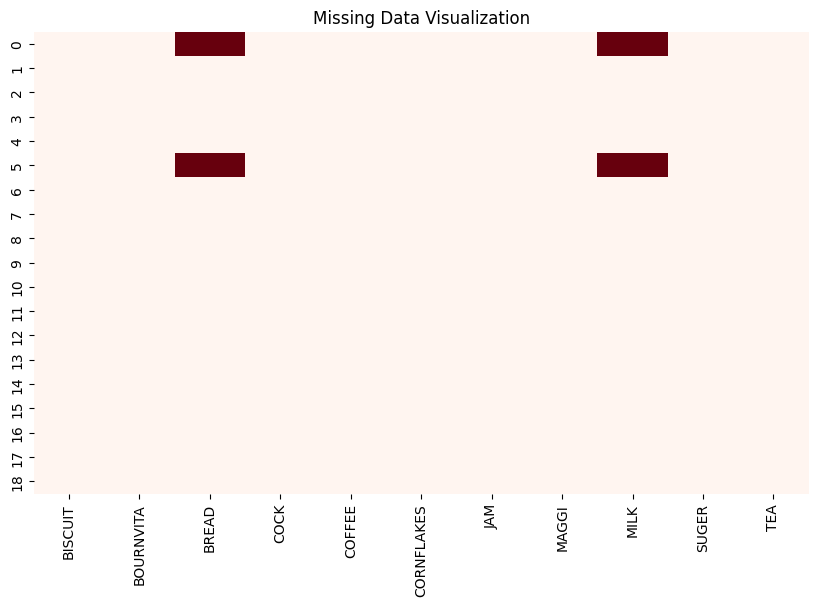


Missing data summary:
BISCUIT       0
BOURNVITA     0
BREAD         2
COCK          0
COFFEE        0
CORNFLAKES    0
JAM           0
MAGGI         0
MILK          2
SUGER         0
TEA           0
dtype: int64


In [27]:
# Missing data visualization

df_missing = df_transformed.copy()
# Let's randomly introduce some missing values in a couple of columns
for col in ['BREAD', 'MILK']:
    df_missing[col] = df_missing[col].astype(float)
    df_missing.loc[df_missing.sample(frac=0.1, random_state=42).index, col] = np.nan

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df_missing.isnull(), cbar=False, cmap="Reds")
plt.title("Missing Data Visualization")
plt.show()

# Display missing summary
print("\nMissing data summary:")
print(df_missing.isnull().sum())

**6. Conclusion/Learnings/Analysis:**

In this handson activity, I gained more understanding of how visual exploration and analysis techniques can be used for interpreting data analysis.  I learned how to use different types of plots to analyze the characteristics of individual variables and the relationships between variables. Lastly, this activity demonstrated the power of data visualization in gaining insights and informing further analysis or decision-making.